# Exam 4th of January 2024, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points. The bonus will be added to the score of the exam and rounded afterwards.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [ ]:
# Insert your anonymous exam ID as a string in the variable below
examID="0029-XST"


---
## Exam vB, PROBLEM 1
Maximum Points = 14


In this problem you will do rejection sampling from complicated distributions, you will also be using your samples to compute certain integrals, a method known as Monte Carlo integration: (Keep in mind that choosing a good sampling distribution is often key to avoid too much rejection)

1. [4p] Fill in the remaining part of the function `problem1_inversion` in order to produce samples from the below distribution using rejection sampling:

$$
    F[x] = 
    \begin{cases}
        0, & x \leq 0 \\
        \frac{e^{x^2}-1}{e-1}, & 0 < x < 1 \\
        1, & x \geq 1
    \end{cases}
$$

2. [2p] Produce 100000 samples (**use fewer if it times-out and you cannot find a solution**) and put the answer in `problem1_samples` from the above distribution and plot the histogram together with the true density. *(There is a timeout decorator on this function and if it takes more than 10 seconds to generate 100000 samples it will timeout and it will count as if you failed to generate.)*
3. [2p] Use the above 100000 samples (`problem1_samples`) to approximately compute the integral

$$
    \int_0^{1} \sin(x) \frac{2e^{x^2} x}{e-1} dx
$$
and store the result in `problem1_integral`.

4. [2p] Use Hoeffdings inequality to produce a 95\% confidence interval of the integral above and store the result as a tuple in the variable `problem1_interval`

5. [4p] Fill in the remaining part of the function `problem1_inversion_2` in order to produce samples from the below distribution using rejection sampling:
$$
    F[x] = 
    \begin{cases}
        0, & x \leq 0 \\
        20xe^{20-1/x}, & 0 < x < \frac{1}{20} \\
        1, & x \geq \frac{1}{20}
    \end{cases}
$$
Hint: this is tricky because if you choose the wrong sampling distribution you reject at least 9 times out of 10. You will get points based on how long your code takes to create a certain number of samples, if you choose the correct sampling distribution you can easily create 100000 samples within 2 seconds.

In [19]:

# Part 1: MORE EXPLANATION https://jaketae.github.io/study/rejection-sampling/
import numpy as np

def problem1_inversion(size):
    samples = []
    while len(samples) < size:
        # Proposal distribution: Uniform(0, 1)
        x = np.random.uniform(0, 1)
        
        # Target density: f(x) ∝ (e^(x^2) - 1) / (e - 1)
        target_density = (np.exp(x**2) - 1) / (np.exp(1) - 1)
        
        # Proposal density: g(x) = 1 (since uniform distribution on [0, 1])
        u = np.random.uniform(0, 1)
        
        # Accept or reject
        if u < target_density:
            samples.append(x)
    
    return np.array(samples)

# Example: Generate 10 samples
#samples = problem1_inversion(10)
#print(samples)

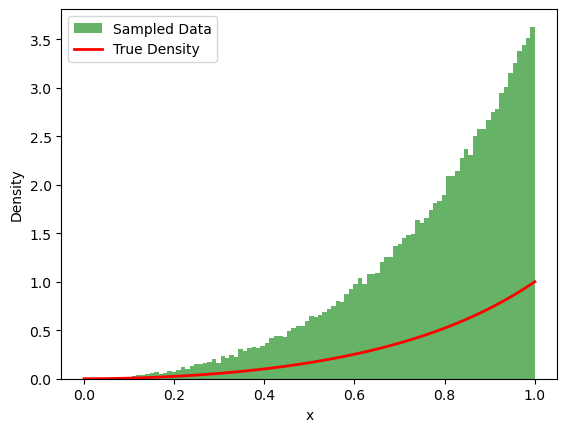

In [21]:
# Part 2

import matplotlib.pyplot as plt

# Generate 100,000 samples
problem1_samples = problem1_inversion(100000)

# Plot the histogram
plt.hist(problem1_samples, bins=100, density=True, alpha=0.6, color='g', label='Sampled Data')

# Plot the true density function
x_vals = np.linspace(0, 1, 1000)
true_density = (np.exp(x_vals**2) - 1) / (np.exp(1) - 1)
plt.plot(x_vals, true_density, 'r', lw=2, label='True Density')

plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()


In [32]:
# Part 3
import numpy as np

def problem1_integral(samples):
    # Evaluate the function at the sample points
    values = np.sin(samples) * (2 * np.exp(samples**2) / (np.exp(1) - 1)) # No es ^ si no **
    
    # Monte Carlo estimation of the integral https://www.geeksforgeeks.org/monte-carlo-integration-in-python/
    integral_estimate = np.mean(values)
    return integral_estimate

# Compute the integral using the samples
problem1_integral = problem1_integral(problem1_samples)
#print(f"Estimated integral: {integral_estimate}")


In [41]:
# Part 4
def interval(samples, integral_estimate):
    n = len(samples)
    epsilon = np.sqrt(np.log(2 / 0.05) / (2 * n))  # Hoeffding's inequality: Chapter 4 Concentration
    
    # Confidence interval
    lower_bound = integral_estimate - epsilon
    upper_bound = integral_estimate + epsilon
    return (lower_bound, upper_bound)

# Calculate and print the confidence interval
problem1_interval = interval(problem1_samples, problem1_integral)
print(f"95% Confidence Interval: {interval}")


95% Confidence Interval: <function interval at 0x0000024879C27740>


In [43]:
# Part 5
import numpy as np
def problem1_inversion_2(size):
    samples = []
    while len(samples) < size:
        # Proposal distribution: Uniform(0, 1/20)
        x = np.random.uniform(0, 1/20)
        
        # Target density: f(x) ∝ 20x * exp(20 - 1/x)
        target_density = 20 * x * np.exp(20 - 1 / x)
        
        # Proposal density: g(x) = 20 (since Uniform(0, 1/20))
        u = np.random.uniform(0, 20)  # Maximum value of target_density!!!!
        
        # Accept or reject
        if u < target_density:
            samples.append(x)
    
    return np.array(samples)

# Example: Generate 10 samples
#samples_2 = problem1_inversion_2(10)
#print(samples_2)


---
#### Local Test for Exam vB, PROBLEM 1
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.

In [46]:

# This cell is just to check that you got the correct formats of your answer
import numpy as np
try:
    assert(isinstance(problem1_inversion(10), np.ndarray)) 
except:
    print("Try again. You should return a numpy array from problem1_inversion")
else:
    print("Good, your problem1_inversion returns a numpy array")

try:
    assert(isinstance(problem1_samples, np.ndarray)) 
except:
    print("Try again. your problem1_samples is not a numpy array")
else:
    print("Good, your problem1_samples is a numpy array")

try:
    assert(isinstance(problem1_integral, float)) 
except:
    print("Try again. your problem1_integral is not a float")
else:
    print("Good, your problem1_integral is a float")

try:
    assert(isinstance(problem1_interval, list) or isinstance(problem1_interval, tuple)) , "problem1_interval not a tuple or list"
    assert(len(problem1_interval) == 2) , "problem1_interval does not have length 2, it should have a lower bound and an upper bound"
except Exception as e:
    print(e)
else:
    print("Good, your problem1_interval is a tuple or list of length 2")

try:
    assert(isinstance(problem1_inversion_2(10), np.ndarray)) 
except:
    print("Try again. You should return a numpy array from problem1_inversion_2")
else:
    print("Good, your problem1_inversion_2 returns a numpy array")

Good, your problem1_inversion returns a numpy array
Good, your problem1_samples is a numpy array
Good, your problem1_integral is a float
Good, your problem1_interval is a tuple or list of length 2
Good, your problem1_inversion_2 returns a numpy array


---
## Exam vB, PROBLEM 2
Maximum Points = 13


Let us build a proportional model ($\mathbb{P}(Y=1 \mid X) = G(\beta_0+\beta \cdot X)$ where $G$ is the logistic function) for the spam vs not spam data. Here we assume that the features are presence vs not presence of a word, let $X_1,X_2,X_3$ denote the presence (1) or absence (0) of the words $("free", "prize", "win")$.

1. [2p] Load the file `data/spam.csv` and create two numpy arrays, `problem2_X` which has shape (n_emails,3) where each feature in `problem2_X` corresponds to $X_1,X_2,X_3$ from above, `problem2_Y` which has shape **(n_emails,)** and consists of a $1$ if the email is spam and $0$ if it is not. Split this data into a train-calibration-test sets where we have the split $40\%$, $20\%$, $40\%$, put this data in the designated variables in the code cell.

2. [4p] Follow the calculation from the lecture notes where we derive the logistic regression and implement the final loss function inside the class `ProportionalSpam`. You can use the `Test` cell to check that it gives the correct value for a test-point.

3. [4p] Train the model `problem2_ps` on the training data. The goal is to calibrate the probabilities output from the model. Start by creating a new variable `problem2_X_pred` (shape `(n_samples,1)`) which consists of the predictions of `problem2_ps` on the calibration dataset. Then train a calibration model using `sklearn.tree.DecisionTreeRegressor`, store this trained model in `problem2_calibrator`.

4. [3p] Use the trained model `problem2_ps` and the calibrator `problem2_calibrator` to make final predictions on the testing data, store the prediction in `problem2_final_predictions`. Compute the $0-1$ test-loss and store it in `problem2_01_loss` and provide a $99\%$ confidence interval of it, store this in the variable `problem2_interval`, this should again be a tuple as in **problem1**.

In [102]:
# Part 1
import string
def word_in_txt(word,txt): # a function that tells if a specific word is in the text
    for a in string.punctuation: # to remove all the punctuation from the text
        txt = txt.replace(a,'')
    txt = txt.lower().split(' ')
    
    return int(bool(word in txt))

def load_sms():
    import csv
    lines = []
    hamspam = {'ham': 0, 'spam': 1}
    with open('data/spam.csv', mode='r',encoding='latin-1') as f:
        reader = csv.reader(f)
        header = next(reader)
        lines = [(hamspam[line[0]], word_in_txt("free",line[1]), word_in_txt("prize",line[1]), word_in_txt("win",line[1])) for line in reader]
        
    return np.array(lines)

data=load_sms()

problem2_X = data[:,1:]
problem2_Y = data[:,0]


n=problem2_X.shape[0]
a=round(n*0.4)
b=round(n*0.6)
problem2_X_train = problem2_X[:a,:]
problem2_X_calib = problem2_X[a:b,:]
problem2_X_test = problem2_X[b:,:]

problem2_Y_train = problem2_Y[:a]
problem2_Y_calib = problem2_Y[a:b]
problem2_Y_test = problem2_Y[b:]

print(problem2_X_train.shape,problem2_X_calib.shape,problem2_X_test.shape,problem2_Y_train.shape,problem2_Y_calib.shape,problem2_Y_test.shape)
#print(problem2_X.shape,problem2_Y.shape)

(2229, 3) (1114, 3) (2229, 3) (2229,) (1114,) (2229,)


In [104]:
# Part 2

class ProportionalSpam(object):
    def __init__(self):
        self.coeffs = None
        self.result = None
    
    # define the objective/cost/loss function we want to minimise
    def loss(self,X,Y,coeffs):
        import numpy as np
    
        # Calculate the logistic predictions
        logits = np.dot(X, coeffs[1:]) + coeffs[0]
        G = 1 / (1 + np.exp(-logits))
    
        # Compute the loss (negative log-likelihood)
        loss = -np.sum(Y * np.log(G) + (1 - Y) * np.log(1 - G))


        return loss

    def fit(self,X,Y):
        import numpy as np
        from scipy import optimize

        #Use the f above together with an optimization method from scipy
        #to find the coefficients of the model
        opt_loss = lambda coeffs: self.loss(X,Y,coeffs)
        initial_arguments = np.zeros(shape=X.shape[1]+1)
        self.result = optimize.minimize(opt_loss, initial_arguments,method='cg')
        self.coeffs = self.result.x
    
    def predict(self,X):
        #Use the trained model to predict Y
        if (self.coeffs is not None):
            G = lambda x: np.exp(x)/(1+np.exp(x))
            return np.round(10*G(np.dot(X,self.coeffs[1:])+self.coeffs[0]))/10 # This rounding is to help you with the calibration


In [106]:
# Part 3

problem2_ps=ProportionalSpam()
problem2_ps.fit(problem2_X_train,problem2_Y_train)


problem2_X_pred = problem2_ps.predict(problem2_X_calib).reshape(-1,1)

from sklearn.tree import DecisionTreeClassifier
problem2_calibrator = DecisionTreeClassifier()
problem2_calibrator.fit(problem2_X_pred,problem2_Y_calib)


DecisionTreeClassifier()

In [108]:
# Part 4

# These are the predicted probabilities
problem2_final_predictions = problem2_calibrator.predict(problem2_ps.predict(problem2_X_test).reshape(-1,1))


# In order to compute this loss we first need to convert the predicted probabilities to a decision
# recall the Bayes classifier?

problem2_01_loss = np.mean(problem2_Y_test!=problem2_final_predictions)

# Recall the interval is given as a tuple (a,b) or a list [a,b]
from Utils import epsilon_bounded
n = len(problem2_Y_test)
#epsilon=epsilon_bounded(len(problem2_Y_test),1,0.01)
epsilon = np.sqrt(np.log(2 / 0.001) / (2 * n))
problem2_interval = (problem2_01_loss-epsilon,problem2_01_loss+epsilon)
print(problem2_interval)

(0.05965044702694457, 0.14223380600131924)


---
#### Local Test for Exam vB, PROBLEM 2
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.

In [83]:
try:
    import numpy as np
    test_instance = ProportionalSpam()
    test_loss = test_instance.loss(np.array([[1,0,1],[0,1,1]]),np.array([1,0]),np.array([1.2,0.4,0.3,0.9]))
    assert (np.abs(test_loss-1.2828629432232497) <1e-6)
    print("Your loss was correct for a test point")
except:
    print("Your loss was not correct on a test point")

Your loss was correct for a test point


---
## Exam vB, PROBLEM 3
Maximum Points = 13


Consider the following four Markov chains, answer each question for all chains:

<img width="400px" src="pictures/MarkovA.png">Markov chain A</img>
<img width="400px" src="pictures/MarkovB.png">Markov chain B</img>
<img width="400px" src="pictures/MarkovC.png">Markov chain C</img>
<img width="400px" src="pictures/MarkovD.png">Markov chain D</img>

1. [2p] What is the transition matrix?
2. [2p] Is the Markov chain irreducible?
3. [3p] Is the Markov chain aperiodic? What is the period for each state?
4. [3p] Does the Markov chain have a stationary distribution, and if so, what is it?
5. [3p] Is the Markov chain reversible?

In [6]:
# PART 1

#------------------------TRANSITION MATRIX -------------------------------
# Answer each one by supplying the transition matrix as a numpy array
# of shape (n_states,n_states), where state (A,B,...) corresponds to index (0,1,...)
import numpy as np

problem3_A    = np.matrix([[0.8,0.2,0,0],
                           [0.6,0.2,0.2,0],
                           [0,0.4,0,0.6],
                           [0,0,0.8,0.2]])
problem3_B    = np.matrix([[0,0.2,0,0.8],
                           [0,0,1,0],
                           [0,1,0,0],
                           [0.5,0,0.5,0]])
problem3_C    = np.matrix([[0.2,0.3,0,0,0.5],
                           [0.2,0.2,0.6,0,0],
                           [0,0.4,0,0.6,0],
                           [0,0,0,0.6,0.4],
                           [0,0,0,0.4,0.6]])
problem3_D    = np.matrix([[0.8,0.2,0,0],
                           [0.6,0.2,0.2,0],
                           [0,0.4,0,0.6],
                           [0.1,0,0.7,0.2]])

In [122]:
# PART 2
#------------------------REDUCIBLE -------------------------------
# Answer each one with a True or False

problem3_A_irreducible = True
problem3_B_irreducible = False 
problem3_C_irreducible = True
problem3_D_irreducible = True


In [10]:
# Period of a Markov Chain:

import numpy as np
from math import gcd
from functools import reduce

def calculate_period(transition_matrix, max_steps=100):
    """
    Calculate the period of each state in a Markov chain.

    Parameters:
    - transition_matrix: np.array, the transition matrix of the Markov chain
    - max_steps: int, the maximum number of steps to consider for detecting returns

    Returns:
    - periods: list of integers, the period of each state
    """
    num_states = transition_matrix.shape[0]
    periods = []

    for state in range(num_states):
        # Find all n where the state can return to itself
        return_times = []
        current_matrix = np.eye(num_states)  # Start with P^0 (identity matrix)
        
        for step in range(1, max_steps + 1):
            current_matrix = np.dot(current_matrix, transition_matrix)  # Compute P^n
            if current_matrix[state, state] > 0:  # Check if return is possible
                return_times.append(step)
        
        # Compute the GCD of all return times
        if return_times:
            state_period = reduce(gcd, return_times)  # GCD of the list
        else:
            state_period = 1  # If no returns found, assume aperiodic
        
        periods.append(state_period)

    return periods

# Calculate the period of each state

periods_A = calculate_period(problem3_A)
periods_B = calculate_period(problem3_B)
periods_C = calculate_period(problem3_C)
periods_D = calculate_period(problem3_D)
print("Periods of states in Markov Chain A:", periods_A)
print("Periods of states in Markov Chain B:", periods_B)
print("Periods of states in Markov Chain C:", periods_C)
print("Periods of states in Markov Chain D:", periods_D)


Periods of states in Markov Chain A: [1, 1, 1, 1]
Periods of states in Markov Chain B: [2, 2, 2, 2]
Periods of states in Markov Chain C: [1, 1, 1, 1, 1]
Periods of states in Markov Chain D: [1, 1, 1, 1]


In [125]:
# PART 3
#------------------------APERIODIC-------------------------------
# Answer each one with a True or False

problem3_A_is_aperiodic = True
problem3_B_is_aperiodic = False
problem3_C_is_aperiodic = True
problem3_D_is_aperiodic = True

# Answer the following with the period of the states as a numpy array
# of shape (n_states,)

problem3_A_periods = np.array([1,1,1,1])
problem3_B_periods = np.array([2,2,2,2])
problem3_C_periods = np.array([1,1,1,1,1])
problem3_D_periods = np.array([1,1,1,1])


In [ ]:
# Stationary Distribution:

import numpy as np

def stationary_distribution(P):
    
    # Transpose P to solve (P^T - I) x = 0
    n = P.shape[0]
    A = np.transpose(P) - np.eye(n)
    
    # Add the normalization condition (sum of probabilities = 1)
    A[-1, :] = np.ones(n)
    b = np.zeros(n)
    b[-1] = 1
    
    # Solve the linear system
    pi = np.linalg.solve(A, b)
    return pi

In [28]:
# PART 4
#------------------------STATIONARY DISTRIBUTION-----------------
# Answer each one with a True or False

# Proposition 7.25:For any irreducible and aperiodic Markov chain there exists at least one stationary distribution.
# We can use this proposition in all the cases except for B. 
problem3_A_has_stationary = True
problem3_B_has_stationary = True
problem3_C_has_stationary = True
problem3_D_has_stationary = True

# Answer the following with the stationary distribution as a numpy array of shape (n_states,)
# if the Markov chain has a stationary distribution otherwise answer with False

import numpy as np
def stationary_distribution(P):
    # Transpose P to solve (P^T - I) x = 0
    n = P.shape[0]
    A = np.transpose(P) - np.eye(n)
    
    # Add the normalization condition (sum of probabilities = 1)
    A[-1, :] = np.ones(n)
    b = np.zeros(n)
    b[-1] = 1
    # Solve the linear system
    try:
        pi = np.linalg.solve(A, b)
        assert np.all(pi >= 0), "Negative probabilities in stationary distribution!"
        assert np.isclose(np.sum(pi), 1), "Stationary distribution does not sum to 1!"
        return pi
    except Exception as e:
        print(f"Error in computing stationary distribution: {e}")
        return None

problem3_A_stationary_dist = stationary_distribution(problem3_A)
problem3_B_stationary_dist = stationary_distribution(problem3_B)
problem3_C_stationary_dist = stationary_distribution(problem3_C)
problem3_D_stationary_dist = stationary_distribution(problem3_D)
print(problem3_A_stationary_dist)
print(problem3_B_stationary_dist)
print(problem3_C_stationary_dist)
print(problem3_D_stationary_dist)


[0.61538462 0.20512821 0.1025641  0.07692308]
[-0.   0.5  0.5  0. ]
[ 0.  -0.  -0.   0.5  0.5]
[0.64516129 0.20430108 0.08602151 0.06451613]


In [24]:
# PART 5
#------------------------REVERSIBLE-----------------
# Answer each one with a True or False
def is_irreversible(P,stationary_dist):
    n=P-shape[0]
    for i in range(n):
        for j in range (n):
            if stationary_dist[i]*P[i,j] != stationaty_dist[j]*P[j,i]:
                return False
            
    return True
problem3_A_is_reversible = is_reversible(problem3_A,problem3_A_stationary_dist)
problem3_B_is_reversible = is_reversible(problem3_B,problem3_B_stationary_dist)
problem3_C_is_reversible = is_reversible(problem3_C,problem3_C_stationary_dist)
problem3_D_is_reversible = is_reversible(problem3_D,problem3_D_stationary_dist)
print(problem3_A_is_reversible)
print(problem3_B_is_reversible)
print(problem3_C_is_reversible)
print(problem3_D_is_reversible)

True
True
True
False
